In [12]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load the dataset
file_path = r"D:\Hungary\Semester 2\Open-Source Technologies for Data Science\Practice\Project\ICU\Modified_ICU_Dataset.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   frame.time_delta  15000 non-null  float64
 1   tcp.time_delta    15000 non-null  float64
 2   tcp.flags.ack     15000 non-null  int64  
 3   tcp.flags.push    15000 non-null  int64  
 4   tcp.flags.reset   15000 non-null  int64  
 5   mqtt.hdrflags     15000 non-null  object 
 6   mqtt.msgtype      15000 non-null  int64  
 7   mqtt.qos          15000 non-null  int64  
 8   mqtt.retain       15000 non-null  int64  
 9   mqtt.ver          15000 non-null  int64  
 10  class             15000 non-null  object 
 11  label             15000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1.4+ MB
None
   frame.time_delta  tcp.time_delta  tcp.flags.ack  tcp.flags.push  \
0          0.000000        0.000000              0               0   
1          0.000052       

In [14]:
features = df.select_dtypes(include=[np.number]).drop(columns=['label'], errors='ignore')

# Display the selected features
print(features.head())

   frame.time_delta  tcp.time_delta  tcp.flags.ack  tcp.flags.push  \
0          0.000000        0.000000              0               0   
1          0.000052        0.000052              1               0   
2          0.000008        0.000000              0               0   
3          0.000012        0.000012              1               0   
4          0.000003        0.000000              0               0   

   tcp.flags.reset  mqtt.msgtype  mqtt.qos  mqtt.retain  mqtt.ver  
0                0             0         0            0         0  
1                0             0         0            0         0  
2                0             0         0            0         0  
3                0             0         0            0         0  
4                0             0         0            0         0  


In [15]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05, novelty=True)

# Fit the model to the features
lof.fit(features)


LocalOutlierFactor(contamination=0.05, novelty=True)

In [16]:
# Predict anomalies (-1 indicates anomaly, 1 indicates normal)
df['anomaly'] = lof.predict(features)

# Map predictions to 0 (normal) and 1 (anomaly) for consistency
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

# Count anomalies and normal points
print(df['anomaly'].value_counts())

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


anomaly
0    14344
1      656
Name: count, dtype: int64


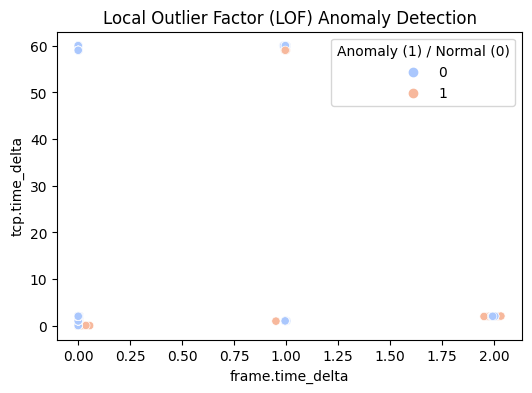

In [22]:
# Plot anomalies using 'frame.time_delta' and 'tcp.time_delta'
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='frame.time_delta', y='tcp.time_delta', hue='anomaly', palette='coolwarm')
plt.title('Local Outlier Factor (LOF) Anomaly Detection')
plt.xlabel('frame.time_delta')
plt.ylabel('tcp.time_delta')
plt.legend(title='Anomaly (1) / Normal (0)')
plt.show()

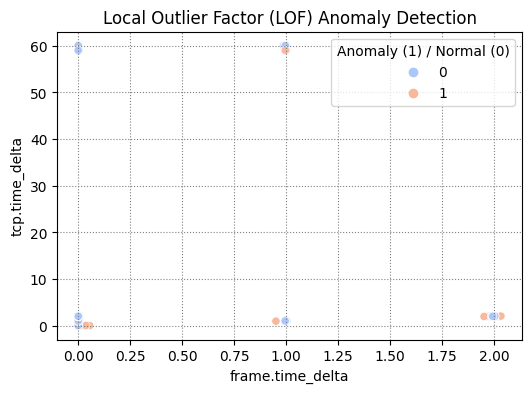

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot anomalies using 'frame.time_delta' and 'tcp.time_delta'
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='frame.time_delta', y='tcp.time_delta', hue='anomaly', palette='coolwarm')
plt.title('Local Outlier Factor (LOF) Anomaly Detection')
plt.xlabel('frame.time_delta')
plt.ylabel('tcp.time_delta')
plt.legend(title='Anomaly (1) / Normal (0)')

# Add grid to the plot
plt.grid(True, linestyle=':', color='gray')

plt.show()

